# Lab 04 Exercises: Numpy

In [1]:
import numpy as np

## 1\. (done) 

Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
m = np.arange(12).reshape((3,4))
print(m)
row_means = np.array([np.mean(m[i, :]) for i in range(m.shape[0])])
col_means = np.array([np.mean(m[:, j]) for j in range(m.shape[1])])
total_mean = np.mean(m, axis= None)

print("row mean: ", row_means, end= '\n')
print("col mean: ", col_means, end= '\n')
print("total mean", total_mean)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
row mean:  [1.5 5.5 9.5]
col mean:  [4. 5. 6. 7.]
total mean 5.5


## 2\. (done) 

Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins



The outer product is given by:
$$
\mathbf {u} \otimes \mathbf {v} =\mathbf {u} \mathbf {v} ^{\textsf {T}}={\begin{bmatrix}u_{1}\\u_{2}\\u_{3}\\u_{4}\end{bmatrix}}{\begin{bmatrix}v_{1}&v_{2}&v_{3}\end{bmatrix}}={\begin{bmatrix}u_{1}v_{1}&u_{1}v_{2}&u_{1}v_{3}\\u_{2}v_{1}&u_{2}v_{2}&u_{2}v_{3}\\u_{3}v_{1}&u_{3}v_{2}&u_{3}v_{3}\\u_{4}v_{1}&u_{4}v_{2}&u_{4}v_{3}\end{bmatrix}}
$$

In [13]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

# 1 Way: np.outer
outer_1 = np.outer(u, v)
# 2 Way: nested list comprehension

outer_2 = np.array( [ [u[i] * v[j]    for j in range(len(v))] for i in range(len(u)) ] )


# 3 Way: using broadcasting
outer_3 = u.reshape(4, 1) * v


print("Way 1: \n ", outer_1)
print("Way 2: \n ", outer_2)
print("Way 3: \n ", outer_3)

Way 1: 
  [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Way 2: 
  [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Way 3: 
  [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


## 3\. (done) 

Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [24]:
np.random.seed(42)
m = np.random.random_sample(size=(10, 6))
mask = (m < 0.1)
print("m: \n", m)

# First try
#rows_to_zero = [i for i in range(mask.shape[0]) if np.any(mask[i, :] == True)]
#print("rows to zero: \n", rows_to_zero)

masked_m = np.array( [np.zeros(m.shape[1]) if np.any(mask[i, :] == True) else m[i, :]  for i in range(m.shape[0]) ] )
print("masked m: \n", masked_m)

m: 
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691]
 [0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802]
 [0.54671028 0.18485446 0.96958463 0.77513282 0.93949894 0.89482735]
 [0.59789998 0.92187424 0.0884925  0.19598286 0.04522729 0.32533033]]
masked m: 
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
 [0.         0.         0.         0.         0.         0.        ]
 [0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]
 [0.         0. 

## 4\.(done) 

Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.72986496 0.76159822 0.79333148 0.82506474]


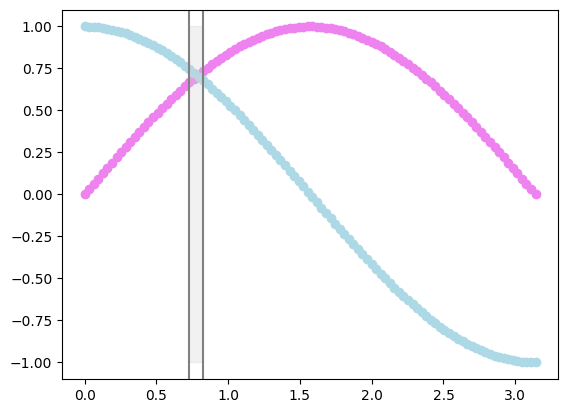

In [50]:
from math import pi, fabs,  cos, sin

a = np.linspace(0, pi, 100)
b = a[::10] # start = a[0] (included), stop= a[-1] (included), step = 10
reversed_a = a[::-1]
mask = np.array( [True if (fabs(cos(element) - sin(element)) < 0.1) else False for element in a] )
c = a[mask]
print(c)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x = a, y = np.sin(a), color = 'violet' )
ax.scatter(x = a, y = np.cos(a), color = 'lightblue' )
ax.axvline(x = c[0], color = 'grey')
ax.axvline(x = c[-1], color = 'grey')
ax.fill_between(x= c, y1= np.ones(len(c)), y2= - np.ones(len(c)), color = 'lightgrey', alpha = 0.3)

## 5\. (done) 

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [63]:
m = np.arange(1, 11).reshape(10, 1) * np.arange(1, 11) # or m = np.outer(np.arange(1, 11))
print("multiplication matrix: \n \n" , m)
trace = np.trace(m)

rows = np.arange(0, m.shape[0])

offset_diagonal = m[rows[0:-1:], rows[1::]]
antidiagonal= m[ rows[:: -1], rows[::+1]]

print("trace: \n", trace)
print("offset diagonal: \n", offset_diagonal)
print("anti diagonal: \n", antidiagonal)

multiplication matrix: 
 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
trace: 
 385
offset diagonal: 
 [ 2  6 12 20 30 42 56 72 90]
anti diagonal: 
 [10 18 24 28 30 30 28 24 18 10]


## 6\. (done) 

Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

  1 miles = 1.609 km

In [73]:
city_names = np.array(['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles'])
city_miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

pair_labels = np.array([name_a + '/' + name_b  for name_a in city_names for name_b in city_names])
pair_miles = np.array([ np.sqrt((miles_a - miles_b)**2) for miles_a in city_miles for miles_b in city_miles])
pair_km = pair_miles * 1.609

dict = {label: key for label,key in zip(pair_labels, pair_km)}
for key, value in zip(dict.keys(), dict.values()):
    print(f"{key:<25} : {value:.3f} km") #good formatting, specifies number of spaces to be occupied by key

Chicago/Chicago           : 0.000 km
Chicago/Springfield       : 318.582 km
Chicago/Saint-Louis       : 487.527 km
Chicago/Tulsa             : 1184.224 km
Chicago/Oklahoma City     : 1401.439 km
Chicago/Amarillo          : 1890.575 km
Chicago/Santa Fe          : 2373.275 km
Chicago/Albuquerque       : 2484.296 km
Chicago/Flagstaff         : 3078.017 km
Chicago/Los Angeles       : 3938.832 km
Springfield/Chicago       : 318.582 km
Springfield/Springfield   : 0.000 km
Springfield/Saint-Louis   : 168.945 km
Springfield/Tulsa         : 865.642 km
Springfield/Oklahoma City : 1082.857 km
Springfield/Amarillo      : 1571.993 km
Springfield/Santa Fe      : 2054.693 km
Springfield/Albuquerque   : 2165.714 km
Springfield/Flagstaff     : 2759.435 km
Springfield/Los Angeles   : 3620.250 km
Saint-Louis/Chicago       : 487.527 km
Saint-Louis/Springfield   : 168.945 km
Saint-Louis/Saint-Louis   : 0.000 km
Saint-Louis/Tulsa         : 696.697 km
Saint-Louis/Oklahoma City : 913.912 km
Saint-Louis/Amaril

## 7\. (done) 

Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [ ]:
N = 99

# Way 0: very naive and inefficient
def naive_sieve(N: int) -> np.ndarray:
    numbers = np.arange(0, N)
    mask = np.ones(N, dtype = bool) # 1 = True: at start, all numbers are prime
    divisors = np.arange(2, N // 2 + 1) # 49 is a divisor for 98

    for divisor in divisors:
        if mask[divisor] == False:
            continue # there is no need to check multiples if divisor has already been decomposed
        numbers_to_check = numbers[mask]
        numbers_to_check = numbers[numbers > divisor + 1]
        for number in numbers_to_check:
            if (number % divisor == 0):
                mask[number] = False
    return numbers[mask]

# Way 1: Eratosthenes_sieve: opt
#def eratosthenes_sieve(N: int) ->np.ndarray:



print(f"naive: \n" ,naive_sieve(N))
%timeit naive_sieve(100) # 134 μs
%timeit naive_sieve(1000) # 4.83 ms
%timeit naive_sieve(10000) # 333 ms

naive: 
 [ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
134 μs ± 570 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.83 ms ± 16.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
333 ms ± 841 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 8\. (done)

 Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a row and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each row")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [16]:
import numpy as np
from numpy import random as npr
npr.seed(12340)
n_walkers = 1000
n_steps = 200
steps = np.arange(0, n_steps)
walker_choices = npr.choice([-1, +1], size = (n_walkers, n_steps))
walker_distances = np.zeros(shape= (n_walkers, n_steps))
for step in np.arange(1, n_steps):
    walker_distances[:, step] = np.sum(walker_choices[:, 0:step], axis = 1)

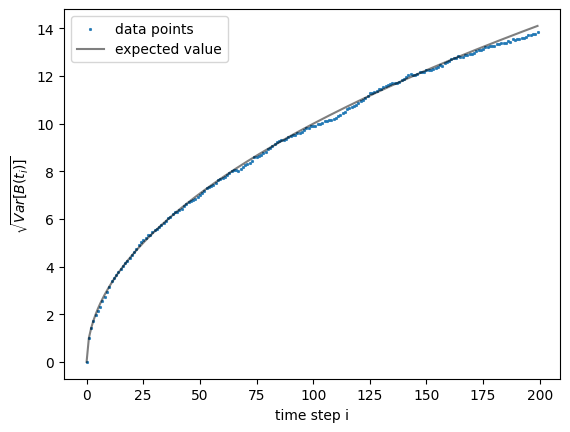

In [38]:
walker_squared_distances = walker_distances ** 2
np.may_share_memory(walker_distances, walker_squared_distances)
variance = np.mean(walker_squared_distances, axis= 0)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#ax.plot(steps, np.sqrt(variance))
ax.scatter(steps, np.sqrt(variance), linewidths= 0.5, s =3, label = 'data points')
ax.plot(steps, np.sqrt(steps), color = 'black', alpha = 0.5, label = 'expected value')
ax.set_xlabel(r"time step i")
ax.set_ylabel(r"$\sqrt{Var[B(t_i)]}$")
ax.legend()


## 9\. (done) 

Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [42]:
! curl -L -o populations.txt https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

# Automatically saves the file in the current working directory

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   123  100   123    0     0    290      0 --:--:-- --:--:-- --:--:--     0    0 --:--:-- --:--:-- --:--:--   290
100    17  100    17    0     0     13      0  0:00:01  0:00:01 --:--:--     0
100   525  100   525    0     0    269      0  0:00:01  0:00:01 --:--:--   269


In [60]:
col_names = ['year', 'hare', 'linxes', 'carrot']
data = np.loadtxt("populations.txt")
years = data[:, 0]
hare = data[:, 1]
linxes = data[:, 2]
carrot = data[:, 3]

In [61]:
means = np.mean(data[:, 1:], axis= 0)
stds = np.std(data[:, 1:], axis= 0)
covariance_matrix = np.cov(data[:, 1:].T)
normalized_covariance_matrix = np.array([[covariance_matrix[i, j] / (stds[i] * stds[j]) for j in range(0, 3)] for i in range(0, 3)])
print(covariance_matrix, end= '\n\n')
print(stds**2, end='\n\n')
print(normalized_covariance_matrix, end = '\n\n')

[[ 4.58558619e+08  2.56418333e+07 -1.21050000e+06]
 [ 2.56418333e+07  2.77422333e+08 -3.85930000e+07]
 [-1.21050000e+06 -3.85930000e+07  1.15910000e+07]]

[4.36722494e+08 2.64211746e+08 1.10390476e+07]

[[ 1.05        0.07548666 -0.01743397]
 [ 0.07548666  1.05       -0.71460603]
 [-0.01743397 -0.71460603  1.05      ]]



There is a problem here evidently: we would expect the covariance of a variable with itself to be exactly 1.0. Instead, we get 1.05. This happens because the numpy methods `np.std()`and `np.cov()` use a different number of degrees of freedom to compute the sample estimates. By default, np.std uses  ddof=0  (population standard deviation)while np.cov uses  ddof=1  (sample covariance). By matching the ddof among the two methods, we get the correct result. For this dataset, data entries are population counts in some location. We are treating your dataset as the full population of interest (e.g., all available data about hares for the specified years). Therefore I think ddof = 0 is more appropriate.

In [62]:
means = np.mean(data[:, 1:], axis= 0)
stds = np.std(data[:, 1:], axis= 0, ddof= 0)
covariance_matrix = np.cov(data[:, 1:].T, ddof= 0)
normalized_covariance_matrix = np.array([[covariance_matrix[i, j] / (stds[i] * stds[j]) for j in range(0, 3)] for i in range(0, 3)])
print(covariance_matrix, end= '\n\n')
print(stds**2, end='\n\n')
print(normalized_covariance_matrix, end = '\n\n')

[[ 4.36722494e+08  2.44207937e+07 -1.15285714e+06]
 [ 2.44207937e+07  2.64211746e+08 -3.67552381e+07]
 [-1.15285714e+06 -3.67552381e+07  1.10390476e+07]]

[4.36722494e+08 2.64211746e+08 1.10390476e+07]

[[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]]



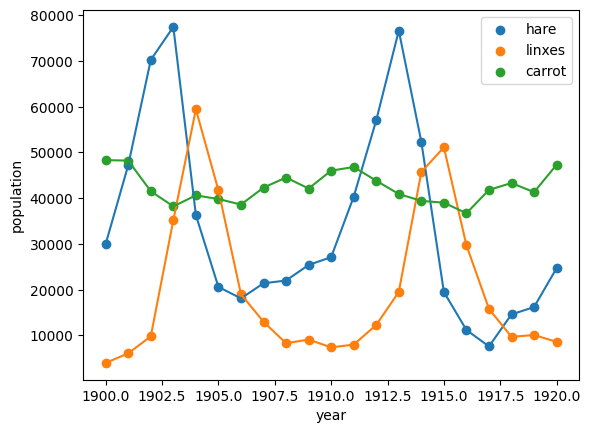

In [65]:
fig, ax = plt.subplots()
ax.scatter(years, hare, label = "hare")
ax.scatter(years, linxes, label = "linxes")
ax.scatter(years, carrot, label = "carrot")

ax.plot(years, hare)
ax.plot(years, linxes)
ax.plot(years, carrot)

ax.set_xlabel("year")
ax.set_ylabel("population")
ax.legend()

*My naive comment:*

 looking at the timeseries, it seems lime the hare and the linxes follow the same evolution, but delayed.
Also, the peaks of the carrot species and the peaks of the linxes seem mirrored (i.e. the local max of one species correspond to the loc. min of the other). The covariance matrix indicates indeed a quite strong anti-correlation (-0.68) betwen carrots and lixes. What I would guess without a priori knowledge is that linxes are predator of the carrots, and linxes compete with hares for some resource (maybe another one).

*My informed comment*:
**YOU GOT IT ALL WRONG!!** 

hare = lepre, linx = lince. Linxes prey on the hare!

- The linx is the predator. Its population is always less than the hare population, at any point in the cycle. (The converse could not be sustainable: a linx needs to eat a lot of hare during its life, so if there were, say, one hare for every linx, after a few days the linx would die of starvation).

- Why the delay?
    When the hares get to the peak, they start to starve. Predation and starvation lower the population of hares. For a while, the linxes continue to rise, because they prey easily on the starving hares. Then, when the hares have become scarce, linxes food resources become scarce and they start declining.